In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-dataset/Crop_recommendation.csv


In [162]:
# Importing libraries

from __future__ import print_function
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
import warnings
import pickle
warnings.filterwarnings('ignore')

In [163]:
PATH = '../input/crop-recommendation-dataset/Crop_recommendation.csv'
df = pd.read_csv(PATH)

In [164]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [165]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [166]:
df.size

17600

In [167]:
df.shape

(2200, 8)

In [168]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [169]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [170]:
df["label"].nunique()

22

In [171]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [172]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [174]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [175]:
df.corr(numeric_only=True)

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

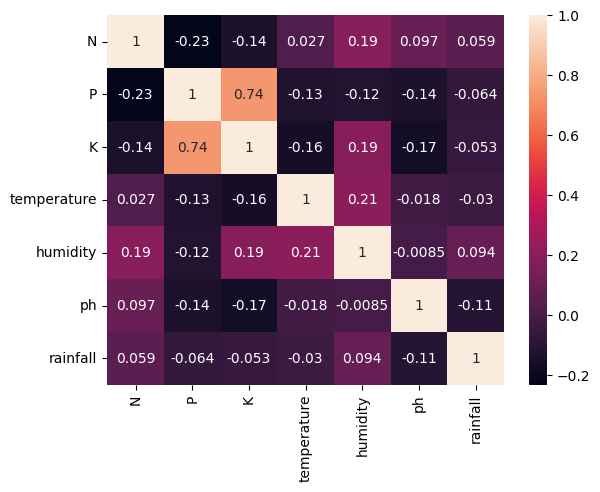

In [176]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [177]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [178]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 42)

# Decision Tree

In [209]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42, max_depth = 5)

DecisionTree.fit(X_train, y_train)

predicted_values = DecisionTree.predict(X_test)
x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  86.5909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.61      1.00      0.75        20
    chickpea       1.00      0.96      0.98        26
     coconut       0.96      0.96      0.96        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.63      0.96      0.76        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [210]:
from sklearn.model_selection import cross_val_score

In [211]:
# Cross validation score (SVM)
score = cross_val_score(DecisionTree,features,target,cv=10)
print(score)
print("average accuracy = ", score.mean())

[0.92727273 0.94545455 0.92272727 0.92272727 0.91818182 0.92272727
 0.86818182 0.92272727 0.94090909 0.93181818]
average accuracy =  0.9222727272727272


**Saving trained Decision Tree model**

In [212]:
# Dump the trained Naive Bayes classifier with Pickle
DT_pkl_filename = 'DecisionTree.pkl'
# Open the file to save as pkl file
DT_Model_pkl = open(DT_pkl_filename, 'wb')
pickle.dump(DecisionTree, DT_Model_pkl)
# Close the pickle instances
DT_Model_pkl.close()

# Guassian Naive Bayes

In [213]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)

predicted_values = NaiveBayes.predict(X_test)
x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes's Accuracy is:  0.9954545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00 

In [214]:
# Cross validation score (SVM)
score = cross_val_score(NaiveBayes,features,target,cv=10)
print(score)
print("average accuracy = ", score.mean())

[1.         0.99545455 1.         0.99090909 0.99090909 1.
 0.99090909 1.         0.98636364 0.99545455]
average accuracy =  0.9950000000000001


In [215]:
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'NBClassifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

# Support Vector Machine (SVM)

In [216]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  0.09090909090909091
              precision    recall  f1-score   support

       apple       1.00      0.13      0.23        23
      banana       1.00      0.05      0.09        21
   blackgram       1.00      0.05      0.10        20
    chickpea       0.00      0.00      0.00        26
     coconut       1.00      0.07      0.14        27
      coffee       1.00      0.06      0.11        17
      cotton       1.00      0.18      0.30        17
      grapes       1.00      0.07      0.13        14
        jute       1.00      0.04      0.08        23
 kidneybeans       0.00      0.00      0.00        20
      lentil       0.03      1.00      0.05        11
       maize       0.00      0.00      0.00        21
       mango       1.00      0.11      0.19        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.11      0.19        19
   muskmelon       1.00      0.59      0.74        17
      orange       0.00      0.00      0.

In [217]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=10)
print(score)
print("average accuracy = ", score.mean())

[0.28181818 0.25909091 0.27272727 0.31818182 0.27727273 0.32727273
 0.25       0.29545455 0.31363636 0.30454545]
average accuracy =  0.29


## ignore this, as accuracy is very LOW

# Logistic Regression

In [218]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)
x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Logistic Regression's Accuracy is:  0.9454545454545454
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.91      0.87      0.89        23
 kidneybeans       1.00      0.95      0.97        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.76      0.84        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00   

In [219]:
# Cross validation score (SVM)
score = cross_val_score(LogReg,features,target,cv=10)
print(score)
print("average accuracy = ", score.mean())

[0.95       0.95909091 0.95909091 0.97272727 0.95909091 0.97272727
 0.97727273 0.95       0.95454545 0.95      ]
average accuracy =  0.9604545454545453


In [220]:
# Dump the trained Naive Bayes classifier with Pickle
LR_pkl_filename = 'LogisticRegression.pkl'
# Open the file to save as pkl file
LR_Model_pkl = open(LR_pkl_filename, 'wb')
pickle.dump(LogReg, LR_Model_pkl)
# Close the pickle instances
LR_Model_pkl.close()

# Random Forest

In [221]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

In [222]:
# Cross validation score (SVM)
score = cross_val_score(RF,features,target,cv=10)
print(score)
print("average accuracy = ", score.mean())

[0.99545455 0.99545455 1.         0.98636364 0.99545455 0.99545455
 0.99545455 0.99545455 0.98636364 0.99545455]
average accuracy =  0.9940909090909091


In [223]:
# Dump the trained Naive Bayes classifier with Pickle
RF_pkl_filename = 'RandomForest.pkl'
# Open the file to save as pkl file
RF_Model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(RF, RF_Model_pkl)
# Close the pickle instances
RF_Model_pkl.close()

# XGBoost

In [224]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [225]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train_encoded)

predicted_values = XB.predict(X_test)

x = accuracy_score(y_test_encoded, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(y_test_encoded,predicted_values))

XGBoost's Accuracy is:  0.9863636363636363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00     

In [226]:
label_encoded = le.fit_transform(labels)

In [227]:
# Cross validation score (SVM)
score = cross_val_score(XB,features,label_encoded,cv=10)
print(score)
print("average accuracy = ", score.mean())

[0.99545455 0.99545455 0.98636364 0.98636364 1.         0.99545455
 0.99545455 0.99545455 0.99545455 1.        ]
average accuracy =  0.9945454545454545


In [228]:
# Dump the trained Naive Bayes classifier with Pickle
XB_pkl_filename = 'XGBoost.pkl'
# Open the file to save as pkl file
XB_Model_pkl = open(XB_pkl_filename, 'wb')
pickle.dump(XB, XB_Model_pkl)
# Close the pickle instances
XB_Model_pkl.close()

# Accuracy Comparison

In [229]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.865909090909091
Naive Bayes --> 0.9954545454545455
SVM --> 0.09090909090909091
Logistic Regression --> 0.9454545454545454
RF --> 0.9931818181818182
XGBoost --> 0.9863636363636363


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

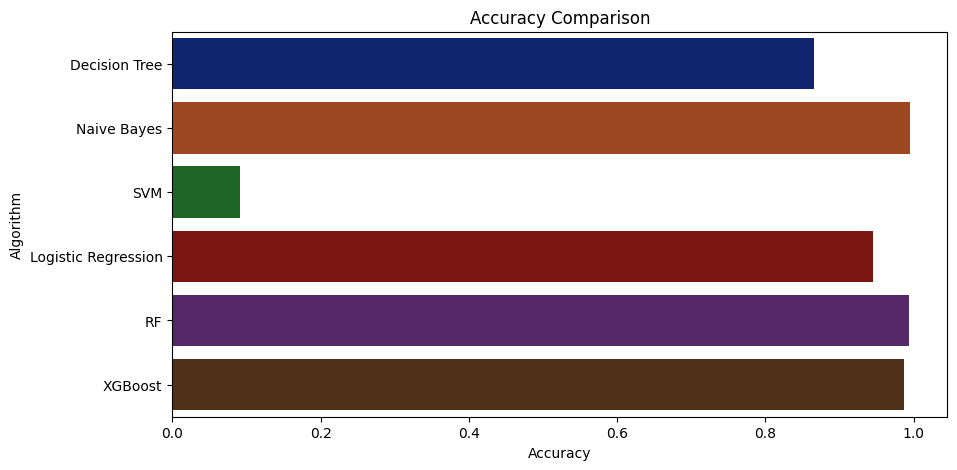

In [230]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

# Prediction Example

In [231]:
data1 = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction1 = NaiveBayes.predict(data1)
print(prediction1)

['coffee']


In [207]:
data2 = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction2 = NaiveBayes.predict(data2)
print(prediction2)

['jute']
